In [1]:
# Import required packages
import pandas as pd 
%matplotlib inline

# Load dataset
df = pd.read_csv("cookie_cats.csv")

# Explore data
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
# Check if there is the same number of players in each AB group.
df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

Text(0, 0.5, 'Number of players')

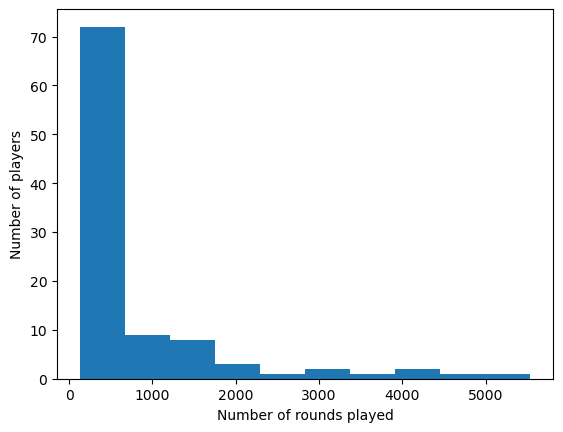

In [3]:
# Count the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plot the distribution of players that played 0 to 100 game rounds
ax = plot_df.iloc[0:100].plot.hist()
ax.set_xlabel("Number of rounds played")
ax.set_ylabel("Number of players")

In [4]:
# Calculate 1-day retention (percentage of users that came back the day after they installed)
df['retention_1'].mean()

0.4452095044850259

In [5]:
# Calculate 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<Axes: ylabel='Density'>

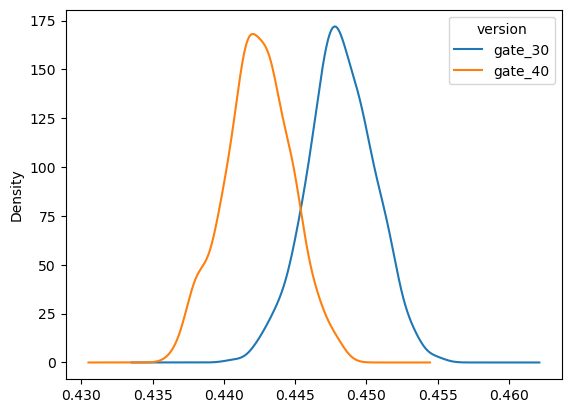

In [8]:
# Create a list with bootstrapped means for each AB-group
boot_1d = []
iterations = 500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transform the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# Create a Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde()

Text(0.5, 0, 'Difference in 1d retention between gate_30 and gate_40')

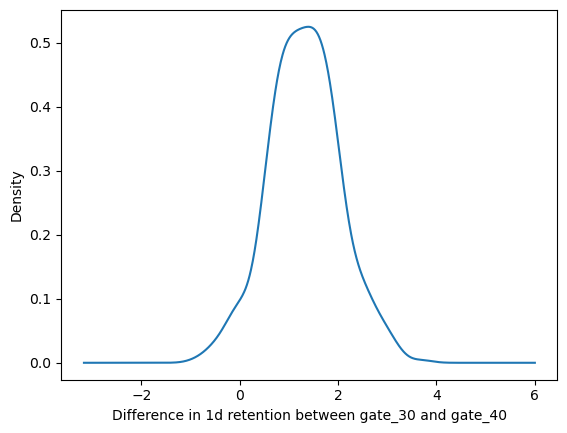

In [16]:
# Add a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100

# Plot the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
ax.set_xlabel("Difference in 1d retention between gate_30 and gate_40")

In [17]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
'{:.1%}'.format(prob)

'95.8%'

In [13]:
# Calculate 7-day retention for both AB-groups
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

<Axes: ylabel='Density'>

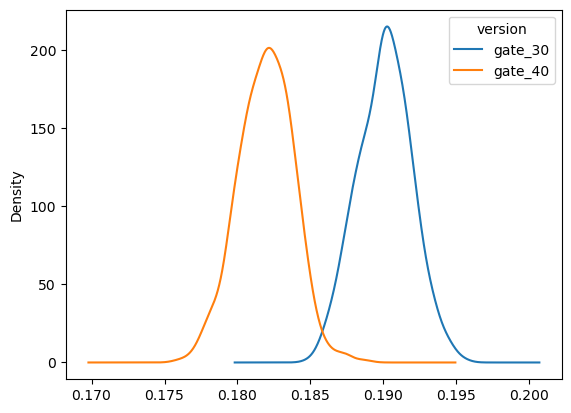

In [12]:
# Create a list with bootstrapped means for each AB-group
boot_7d = []
iterations = 500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transform the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Create a Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot.kde()

Text(0.5, 0, '% difference in means')

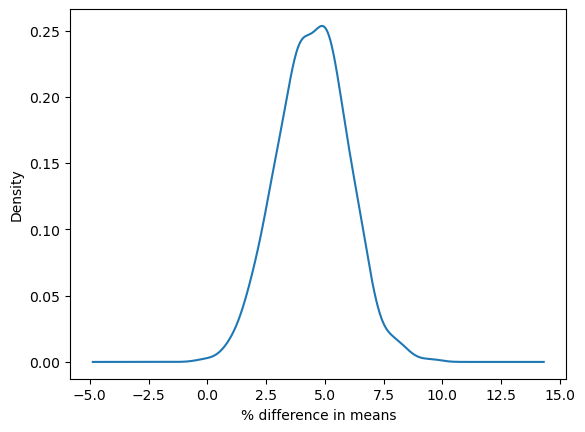

In [14]:
# Add a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

# Plot the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

In [15]:
# Calculate the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).mean()
'{:.1%}'.format(prob)

'99.8%'